In [1]:
!pip install psycopg2-binary sqlalchemy


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 5.2 MB/s eta 0:00:00


In [1]:
!pip install praw


In [2]:
import praw
from textblob import TextBlob
import psycopg2

# Setup Reddit API (use your credentials)
reddit = praw.Reddit(client_id='vqR-SAUdq2xx5KciYtmCDg', 
                     client_secret='Tnp-LGK20WwQvSOJows6ZlK5tjmBxw', 
                     user_agent='my-reddit-sentiment-analyzer')

# Connect to PostgreSQL
conn = psycopg2.connect(dbname="sentiment_analysis", user="postgres", password="byebye@nyc04", host="localhost", port="5432")
cursor = conn.cursor()

def get_sentiment(post_text):
    """Returns sentiment polarity for the given text."""
    analysis = TextBlob(post_text)
    return analysis.sentiment.polarity

def insert_post(post_text, sentiment_score):
    """Inserts the post and sentiment score into the database."""
    cursor.execute("INSERT INTO tweets (tweet_text, sentiment_score) VALUES (%s, %s)", (post_text, sentiment_score))
    conn.commit()

# Fetch posts from a subreddit
subreddit = reddit.subreddit('all')  # You can change this to any subreddit, e.g., 'python', 'technology', etc.
for post in subreddit.new(limit=10):  # Fetch 10 recent posts
    post_text = post.title  # You can also use post.selftext for text content in case of text posts
    sentiment_score = get_sentiment(post_text)  # Get sentiment score for the post
    insert_post(post_text, sentiment_score)  # Insert into database

# Close database connection
cursor.close()
conn.close()

print("Data processing complete!")


Data processing complete!


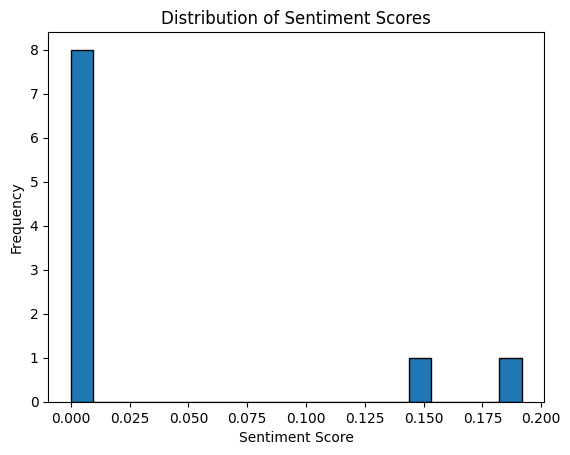

In [4]:
import matplotlib.pyplot as plt
import psycopg2

# Connect to PostgreSQL
conn = psycopg2.connect(dbname="sentiment_analysis", user="postgres", password="byebye@nyc04", host="localhost", port="5432")
cursor = conn.cursor()

# Query to get sentiment data
cursor.execute("SELECT sentiment_score FROM tweets;")
sentiment_scores = cursor.fetchall()

# Close connection
cursor.close()
conn.close()

# Extract sentiment scores into a list
sentiment_scores = [score[0] for score in sentiment_scores]

# Plot the sentiment scores
plt.hist(sentiment_scores, bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [6]:
!pip install dash

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------ --------------------------------- 1.3/7.8 MB 7.4 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/7.8 MB 6.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/7.8 MB 6.7 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.8 MB 4.8 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.8 MB 4.3 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/7.8 MB 3.8 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 3.4 MB/s eta 0:00:01
   ------------------------- -------------- 5.0/7.8 MB 3.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 2.8 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 2.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 2.8 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 2.8 MB/s eta 0:00:01
   ----------------

In [8]:
import dash
from dash import dcc, html
import plotly.graph_objs as go
import psycopg2

app = dash.Dash(__name__)

# Connect to PostgreSQL
conn = psycopg2.connect(dbname="sentiment_analysis", user="postgres", password="byebye@nyc04", host="localhost", port="5432")
cursor = conn.cursor()

# Query to get sentiment data
cursor.execute("SELECT sentiment_score FROM tweets;")
sentiment_scores = cursor.fetchall()

# Close connection
cursor.close()
conn.close()

# Extract sentiment scores into a list
sentiment_scores = [score[0] for score in sentiment_scores]

# Create a histogram for sentiment distribution
fig = go.Figure(data=[go.Histogram(x=sentiment_scores, nbinsx=20)])
fig.update_layout(title="Sentiment Distribution",
                  xaxis_title="Sentiment Score",
                  yaxis_title="Frequency")

app.layout = html.Div(children=[
    html.H1(children='Reddit Sentiment Analysis'),
    dcc.Graph(
        id='sentiment-histogram',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)
